# ITS307 Data Analytics : Spring Semester 2022
# Assignment 4

# Unsupervised Learning: Clustering

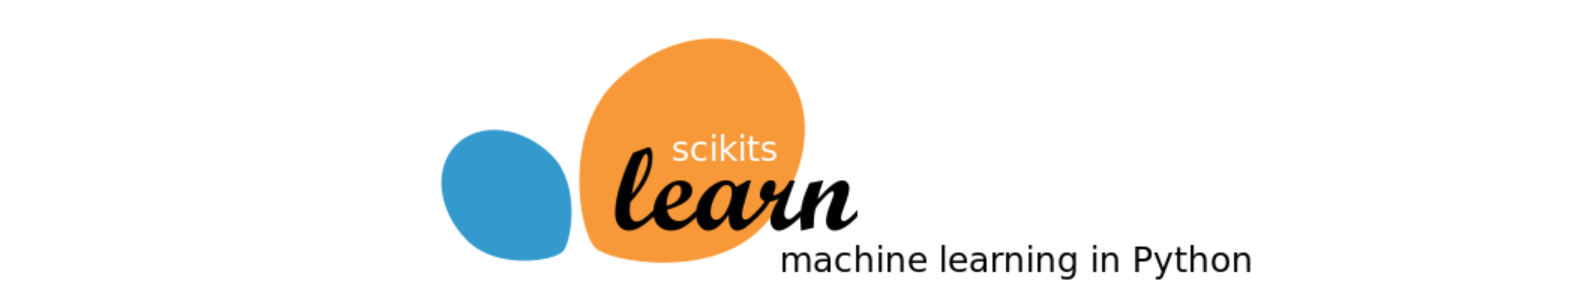

# Table of Contents 
<ol start="0">
<li> Part A </li>
<li> Part B </li>
<li> Part C</li>
</ol>

## Note: Handle null values and special characters if any.

# Part A

Instructions:
1. Read data from data1.csv file and give random column names such as A, B, C and so on.


2. Use both Elbow method and silhouette_score to find best value of K for KMean clustering. Justify your answer.


3. Create Kmean model with value of K chosen from second step. Evaluate your model and justify the goodness of your model.


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

## 1. Read data from data1.csv

In [397]:
data1 = pd.read_csv('data1.csv')
data1.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K','L','M']
data1.head()

A     B     C     D    E     F     G     H     I     J     K     L  \
0  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
2  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
3  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   
4  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97  6.75  1.05  2.85   

      M  
0  1050  
1  1185  
2  1480  
3   735  
4  1450

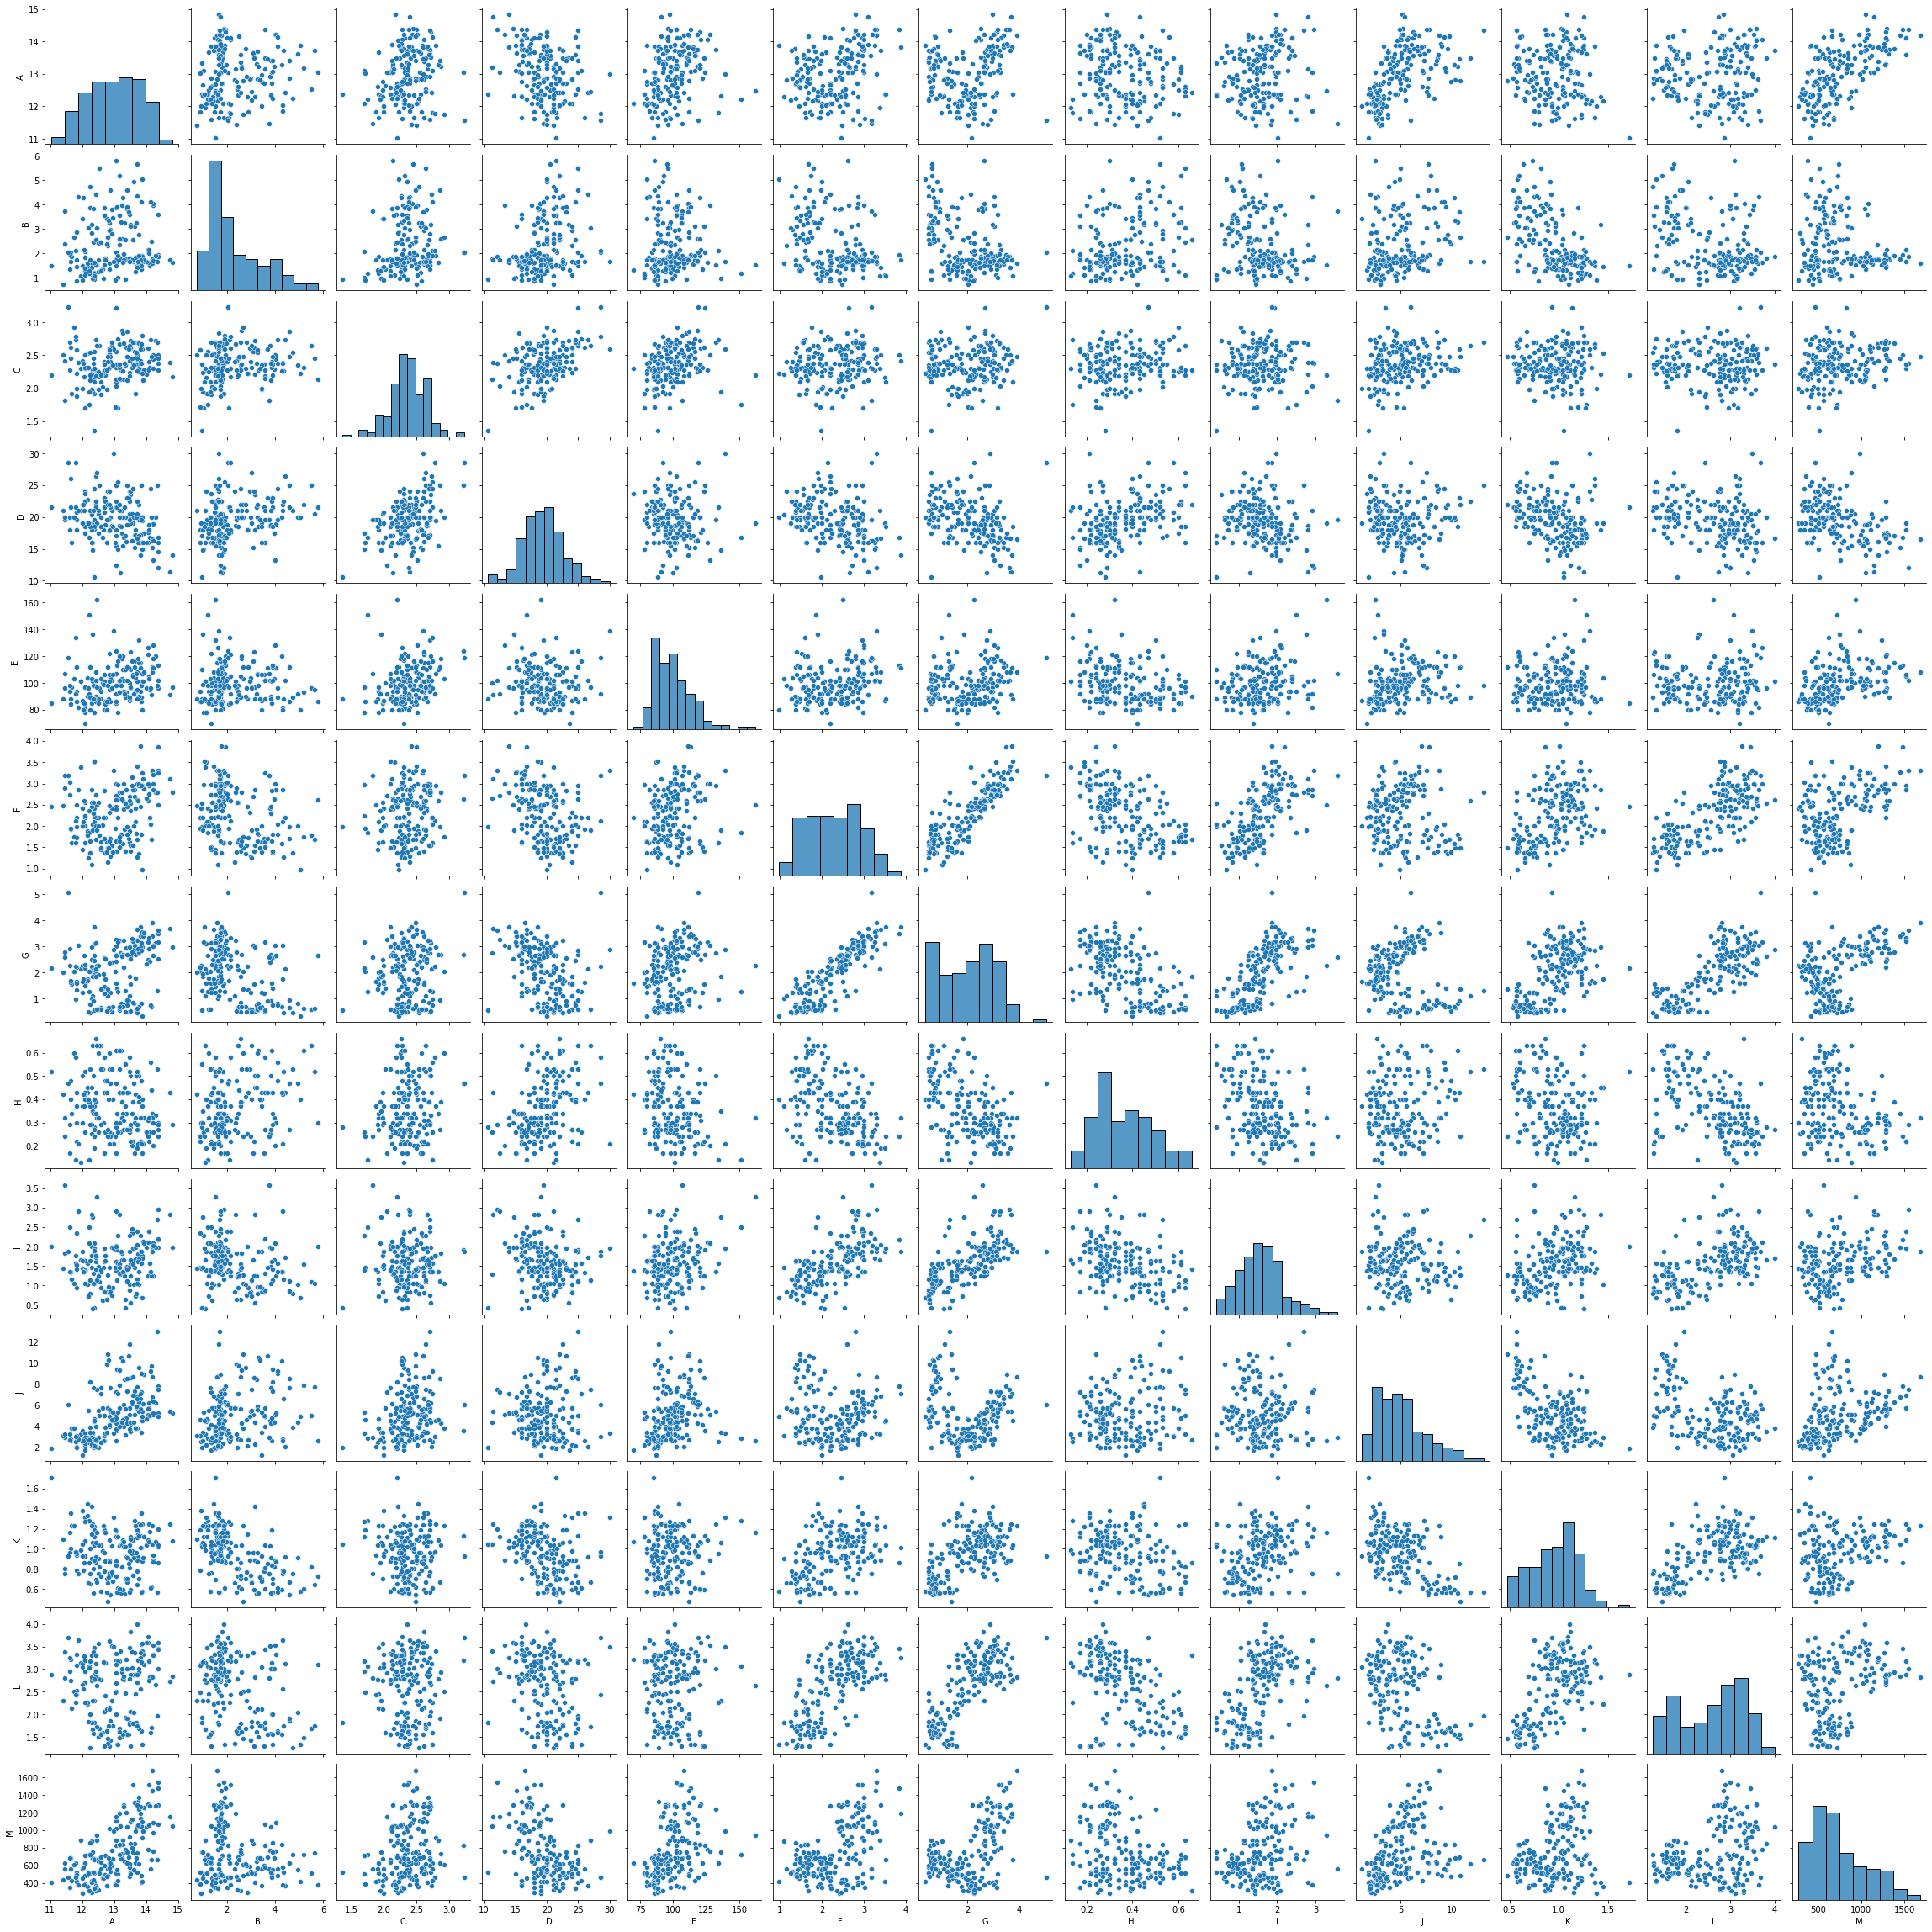

In [398]:
sns.pairplot(data1)
plt.show()

In [399]:
data1 = data1[['L', 'G']]
data1.head()

L     G
0  3.40  2.76
1  3.17  3.24
2  3.45  3.49
3  2.93  2.69
4  2.85  3.39

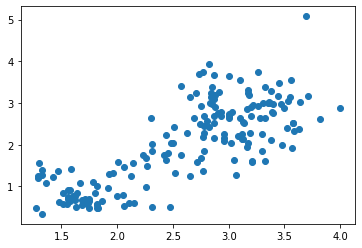

In [400]:
plt.scatter(data1['L'], data1['G'])
plt.show()

## 2. Find best value of K 

### Using KMeans to determine best K

In [401]:
K = np.arange(1,10)
sdistance = []
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(data1)
    sdistance.append(km.inertia_)

In [402]:
sdistance

[263.02973446327684,
 72.81851282221632,
 43.68448696187148,
 34.19882122217651,
 28.978219411801515,
 24.13266590684583,
 19.924772061267298,
 16.823978977177475,
 15.077443421620455]

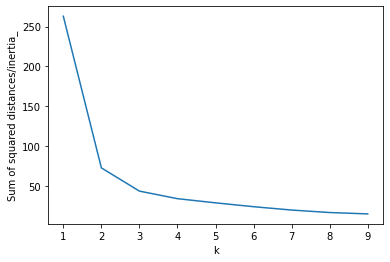

In [403]:
plt.plot(K, sdistance)
plt.xlabel('k')
plt.ylabel('Sum of squared distances/inertia_')
plt.show()

#### Justification: 

From the above plot, We see that the line drops at once at the beginning but we see that at the k value 2, it forms the maximum curvature which we can take can be considered optimal Sum of squared distances of samples to their cluster centre. So the best value of k is 3.

### Using silhouette_score to find the best K

In [404]:
from sklearn.metrics import silhouette_score

s_scores = []
K = np.arange(2,11)
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(data1)
    s_scores.append(silhouette_score(data1, km.labels_, metric='euclidean'))
    


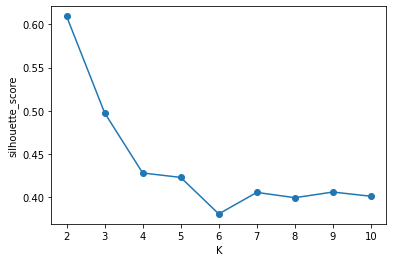

In [405]:
plt.plot(K, s_scores,'-o')
plt.xlabel('K')
plt.ylabel('silhouette_score')
plt.show()

#### Explanation:

By plotting the silhouete_score which is the measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation), we find that the value of silhouette_score closest to 1 is given by K = 2 which  is optimal.

Conclusion from two plots: Since from both the graph I got the best k as 2 I will take the k as 2 for my kmeans model.

## 3. Create Kmean model 

In [406]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2)
kmean.fit(data1)

KMeans(n_clusters=2)

In [407]:
kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [408]:
data1['cluster'] = kmean.labels_
data1.head()

L     G  cluster
0  3.40  2.76        1
1  3.17  3.24        1
2  3.45  3.49        1
3  2.93  2.69        1
4  2.85  3.39        1

In [409]:
data1.cluster.unique()

array([1, 0])

In [410]:
cluster0 = data1[data1['cluster']==0]
cluster0.head(1)

L     G  cluster
58  1.82  0.57        0

In [411]:
cluster1 = data1[data1['cluster']==1]
cluster1.head(1)

L     G  cluster
0  3.4  2.76        1

In [412]:
centroid = kmean.cluster_centers_
centroid

array([[1.87211268, 0.98985915],
       [3.09471698, 2.71575472]])

In [413]:
centroidf = pd.DataFrame(data=centroid,columns=['x','y'])
centroidf



x         y
0  1.872113  0.989859
1  3.094717  2.715755

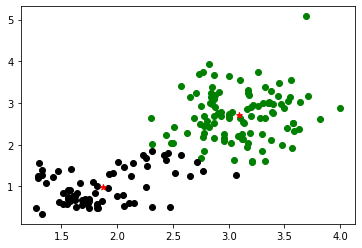

In [414]:
plt.scatter(cluster1['L'], cluster1['G'], color='green')
plt.scatter(cluster0['L'], cluster0['G'], color='black')
plt.scatter(centroidf.x, centroidf.y, color='red', marker='*')
plt.show()

In [415]:
from sklearn.metrics import silhouette_score

silhouette_score(data1.drop('cluster', axis=1),kmean.labels_ )

0.6093202360519849

From the above evaluation, I can say that my model is on average good as the silhouette_score is 0.60 for an unsupervised machine learning problem

# Part B

### INSTRUCTIONS
1. Read data from data2.csv and give any random column names such as x,y.


2. Use appropriate techniques to find best choices of algorithm to apply to given dataset. Justify your choice.


3. Create clustering model from your choices of algorithm in step 2. Tune required hyperparameters to get expected clusters.


4. Use seaborn to plot your clusters using different markers and colors for each clusters formed.


5. Evaluate your model and justify the goodness of the cluster formed.

## 1. Read data from data2.csv 


In [536]:
data2 = pd.read_csv('data2.csv')
data2.columns = ['x', 'y']
data2.head()

x         y
0  0.360573 -1.157805
1 -1.684897 -1.133287
2  1.946917 -1.187486
3  0.220311  0.844432
4  1.344560 -0.991684

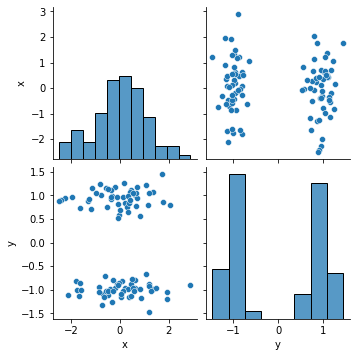

In [537]:
sns.pairplot(data2)
plt.show()

## 2. Find best choices of algorithm 


    

By looking at the above plot, there is two separate clusters of a unique shape. I will use DBSCAN to form the clusters.

In [538]:
km = KMeans(n_clusters = 2)
km.fit(data2)
km.labels_

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [539]:
data2['cluster'] = km.labels_
data2.cluster.unique()

array([0, 1])

In [540]:
km0 = data2[data2.cluster == 0]

In [541]:
km1 = data2[data2.cluster == 1]

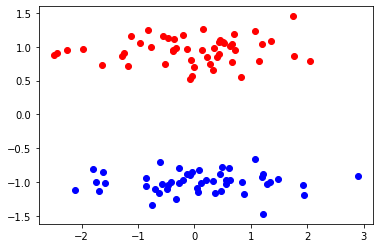

In [542]:
plt.scatter(km0.x, km0.y, color='blue')
plt.scatter(km1.x, km1.y, color='red')

In [543]:
dbs = DBSCAN(eps=0.3,min_samples=5)
dbs.fit(data2.drop('cluster',axis=1))


DBSCAN(eps=0.3)

In [544]:
data2['cluster'] = dbs.labels_
data2.cluster.unique()

array([ 0,  3, -1,  1,  2], dtype=int64)

In [545]:
db0 = data2[data2.cluster == 0]
db1 = data2[data2.cluster == 1]
db2 = data2[data2.cluster == 2]
dbn = data2[data2.cluster == -1]

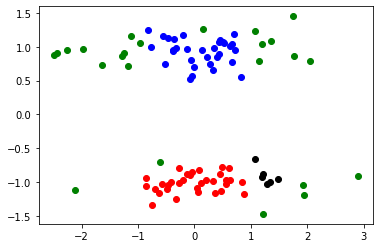

In [546]:
plt.scatter(db0.x,db0.y,color='red')
plt.scatter(db1.x,db1.y,color='blue')
plt.scatter(db2.x,db2.y,color='black')
plt.scatter(dbn.x,dbn.y,color='green')

In [547]:
# from sklearn.neighbors import NearestNeighbors
# nbrs = NearestNeighbors()
# nbrs.fit(data2)
# distances, indices = nbrs.kneighbors(data2)

In [548]:
# # Plotting K-distance Graph
# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# plt.figure(figsize=(5,5))
# plt.plot(distances)
# plt.title('K-distance Graph',fontsize=20)
# plt.xlabel('Data Points sorted by distance',fontsize=14)
# plt.ylabel('Epsilon',fontsize=14)
# plt.show()

## 3. Create clustering model 

    

In [558]:
kmean = KMeans(n_clusters = 2)
kmean.fit(data2)

KMeans(n_clusters=2)

In [559]:
data2['cluster'] = kmean.labels_
data2.head()

x         y  cluster
0  0.360573 -1.157805        1
1 -1.684897 -1.133287        1
2  1.946917 -1.187486        1
3  0.220311  0.844432        0
4  1.344560 -0.991684        1

In [560]:
data2.cluster.unique()

array([1, 0])

In [561]:
data2.cluster.value_counts()

0    50
1    49
Name: cluster, dtype: int64

## 4. Use seaborn to plot your clusters 

   

In [562]:
data2['cluster'] = kmean.labels_
data2.cluster.unique()

array([1, 0])

In [563]:
km0 = data2[data2.cluster == 0]

In [564]:
km1 = data2[data2.cluster == 1]

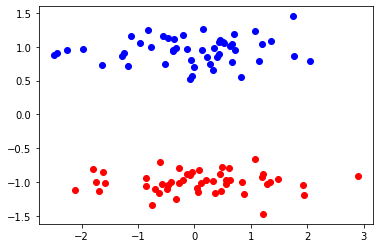

In [565]:
plt.scatter(km0.x, km0.y, color='blue')
plt.scatter(km1.x, km1.y, color='red')

## 5. Evaluate your model 

In [566]:
from sklearn.metrics import silhouette_score

silhouette_score(data2.drop('cluster', axis=1),kmean.labels_ )

0.49358305210306014

My model is ended up being not a good model since the silhouette_score is 0.49 which is not near to 1 but since it is a positive number, the model is quite fine

# Part C

### INSTRUCTIONS:

1. Read data from data3.csv and name columns as x and y.


2. Assuming 4 clusters in the given datasets, compare both clustering algorithm and mention which algorithm is more suitable.


3. Use seaborn to plot your clusters for both the algorithms.

In [3]:
data3 = pd.read_csv('data3.csv')
data3.columns = ['x', 'y']
data3.head()

x         y
0 -3.446856 -0.340388
1 -2.924456 -0.115665
2 -4.533322  2.782269
3 -4.257819  8.498752
4 -3.492740 -0.672294

In [4]:
from sklearn.cluster import KMeans

k = KMeans(n_clusters = 4)
k.fit(data3)
k.labels_

array([0, 0, 2, 1, 0, 1, 3, 2, 3, 3, 1, 1, 3, 3, 2, 2, 1, 2, 0, 0, 1, 0,
       3, 1, 3, 1, 3, 3, 0, 1, 2, 0, 2, 3, 2, 3, 3, 2, 2, 1, 1, 3, 1, 0,
       2, 1, 3, 0, 1, 3, 2, 1, 0, 3, 3, 2, 2, 3, 3, 2, 2, 1, 1, 0, 0, 3,
       2, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 3, 0, 2, 0,
       1, 2, 0, 2, 3, 3, 2, 3, 1, 0, 3])

In [5]:
data3['cluster'] = k.labels_

In [6]:
k0 = data3[data3.cluster == 0]

In [7]:
k1 = data3[data3.cluster == 1]

In [8]:
k2 = data3[data3.cluster == 2]

In [9]:
k3 = data3[data3.cluster == 3]

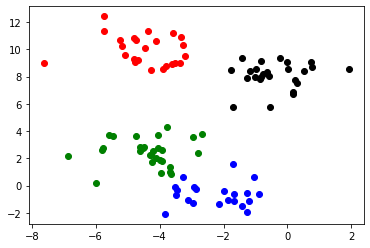

In [10]:
plt.scatter(k0.x,k0.y,color='blue')
plt.scatter(k1.x,k1.y,color='red')
plt.scatter(k2.x,k2.y,color='green')
plt.scatter(k3.x,k3.y,color='black')

In [24]:
# from sklearn.metrics import silhouette_score

# silhouette_score(data3.drop('cluster', axis=1),k.labels_ )

In [12]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors()
nbrs.fit(data3)
distances, indices = nbrs.kneighbors(data3)

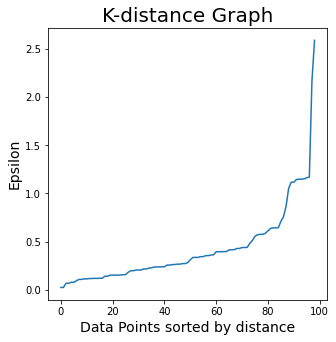

In [13]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(5,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [18]:
d = DBSCAN(eps=0.55,min_samples=5)
d.fit(data3.drop('cluster',axis=1))
d.labels_

array([-1, -1,  0,  3, -1, -1,  1,  0,  1, -1, -1, -1,  1, -1,  0, -1,  3,
        0, -1,  2, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  0,  1,
       -1, -1,  1,  0, -1, -1, -1, -1,  3,  2,  0,  3,  1,  0, -1,  1,  0,
        3,  2, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,
       -1,  0,  0, -1,  3,  2, -1,  0,  0, -1,  2,  2,  2,  0, -1, -1, -1,
       -1, -1,  2, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [19]:
data3['cluster'] = d.labels_
data3.cluster.unique()

array([-1,  0,  3,  1,  2], dtype=int64)

In [20]:
d0 = data3[data3.cluster == 0]
d1 = data3[data3.cluster == 1]
d2 = data3[data3.cluster == 2]
d3 = data3[data3.cluster == 3]

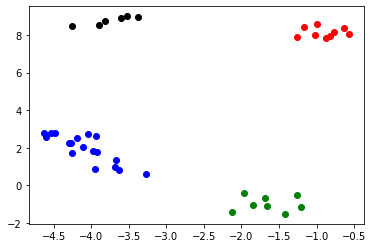

In [21]:
plt.scatter(d0.x,d0.y,color='blue')
plt.scatter(d1.x,d1.y,color='red')
plt.scatter(d2.x,d2.y,color='green')
plt.scatter(d3.x,d3.y,color='black')

In [23]:
# from sklearn.metrics import silhouette_score

# silhouette_score(data3.drop('cluster', axis=1),d.labels_ )

Conclusion: From the above comparison, dbscan forms a distinct clusters.